In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [22]:
img1 =cv2.imread('mo1.png',0)
img2 =cv2.imread('mo2.png',0)

In [23]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

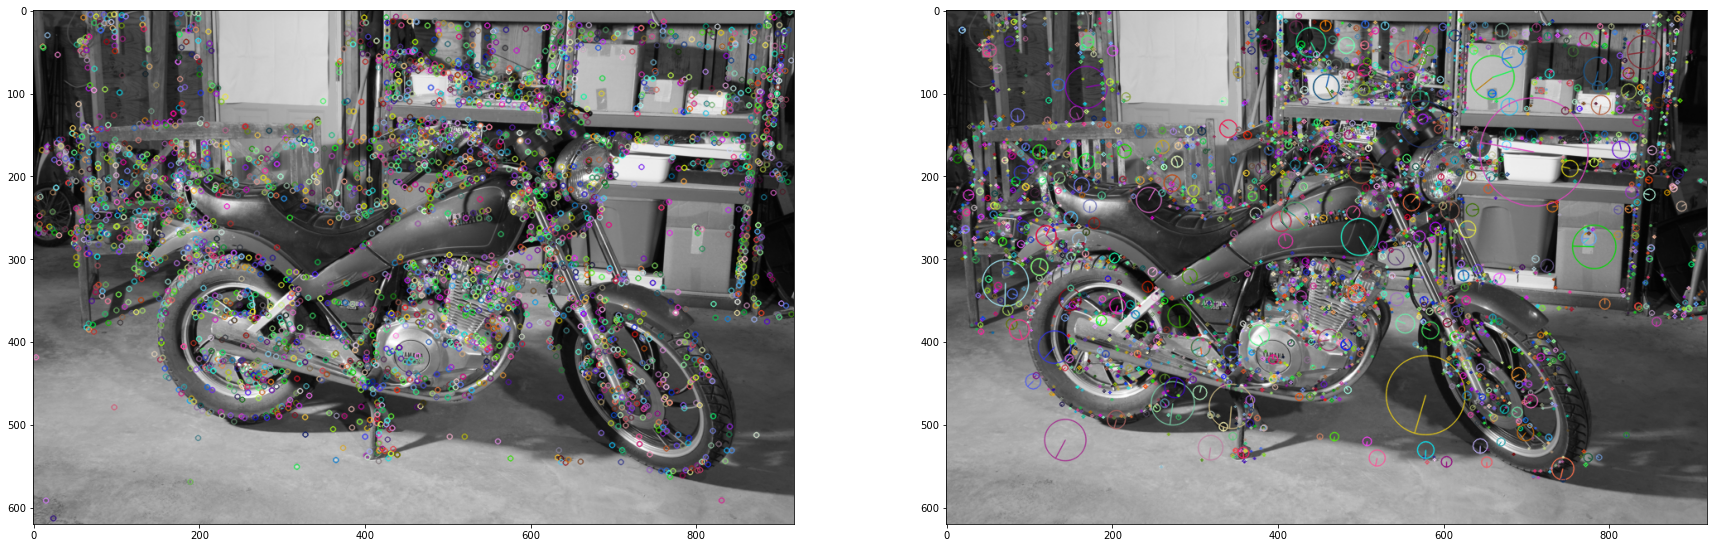

In [24]:
img1v=cv2.drawKeypoints(img1,kp1,img1)
img2v=cv2.drawKeypoints(img2,kp2,img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(30,26))
plt.subplot(121),plt.imshow(img1v)
plt.subplot(122),plt.imshow(img2v)
plt.show()

In [28]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.12*n.distance:
        good.append([m])

In [29]:
print(len(good))

31


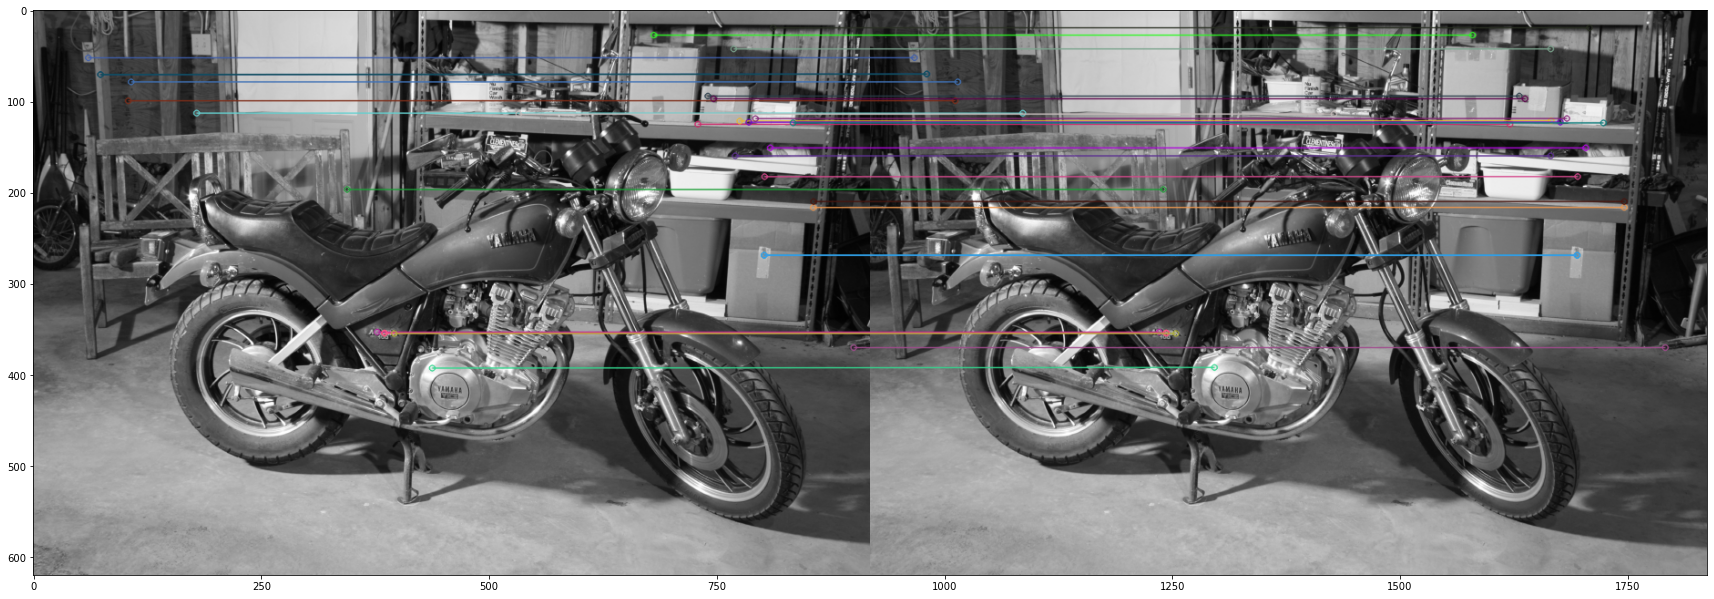

(<matplotlib.image.AxesImage at 0x29e1e701c70>, None)

In [30]:
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None, flags=2)

plt.figure(figsize=(30,15))
plt.imshow(img3),plt.show()